PARTE 1

In [8]:
import pandas as pd
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import locale

# 1

In [9]:
df = pd.read_csv("household_power_consumption.txt", sep = ";")
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


# 2

In [10]:
df["Global_active_power"].head(10)
# A energia efetiva consumida por determinado aparelho para realizar trabalho útil.
# Gera trabalho útil
# Unidade: Watts (W), quilowatts (kW), megawatts (MW).
# (o que realmente vira luz, calor e outros)

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666
5,3.520
6,3.702
7,3.700
8,3.668
9,3.662


In [11]:
df["Global_reactive_power"].head(10)
# Potência que cria um campo, podendo ser elétrico ou magnético, que os aparelhos geralmente criam.
# Não é convertido para trabalho útil.
# Unidade: volt-ampère reativo (var), kvar, Mvar.
# (associado a motores, aparelhos com bobinas e outros)

,Global_reactive_power
0,0.418
1,0.436
2,0.498
3,0.502
4,0.528
5,0.522
6,0.520
7,0.520
8,0.510
9,0.510


# 3

In [12]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [13]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


# 4

In [14]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['DayOfWeek'] = df['DateTime'].dt.day_name()

In [15]:
df["DateTime"].head(10)

,DateTime
0,2006-12-16 17:24:00
1,2006-12-16 17:25:00
2,2006-12-16 17:26:00
3,2006-12-16 17:27:00
4,2006-12-16 17:28:00
5,2006-12-16 17:29:00
6,2006-12-16 17:30:00
7,2006-12-16 17:31:00
8,2006-12-16 17:32:00
9,2006-12-16 17:33:00


In [16]:
df["DayOfWeek"]

,DayOfWeek
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday
...,...
2075254,Friday
2075255,Friday
2075256,Friday
2075257,Friday


# 5

In [17]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'])

df_2007 = df[df['DateTime'].dt.year == 2007].copy()
print(f"Registros de 2007: {len(df_2007)}")

if len(df_2007) > 0:
    df_2007['Global_active_power'] = pd.to_numeric(df_2007['Global_active_power'], errors='coerce')

    df_2007_clean = df_2007.dropna(subset=['Global_active_power'])
    print(f"Registros após limpeza: {len(df_2007_clean)}")

    if len(df_2007_clean) > 0:
        daily_avg_2007 = df_2007_clean.groupby(df_2007_clean['DateTime'].dt.date)['Global_active_power'].mean()

        print(f"Média de consumo diário em 2007: {daily_avg_2007.mean():.4f} kW")
        print(f"Desvio padrão: {daily_avg_2007.std():.4f} kW")
        print(f"Número de dias com dados: {len(daily_avg_2007)}")
        print(f"Consumo mínimo diário: {daily_avg_2007.min():.4f} kW")
        print(f"Consumo máximo diário: {daily_avg_2007.max():.4f} kW")
    else:
        print("Todos os registros de 2007 têm valores nulos para Global_active_power")
else:
    print("Nenhum registro encontrado para 2007 nos dados.")

Registros de 2007: 525600
Registros após limpeza: 521669
Média de consumo diário em 2007: 1.1161 kW
Desvio padrão: 0.4814 kW
Número de dias com dados: 364
Consumo mínimo diário: 0.2230 kW
Consumo máximo diário: 2.7984 kW


# 6

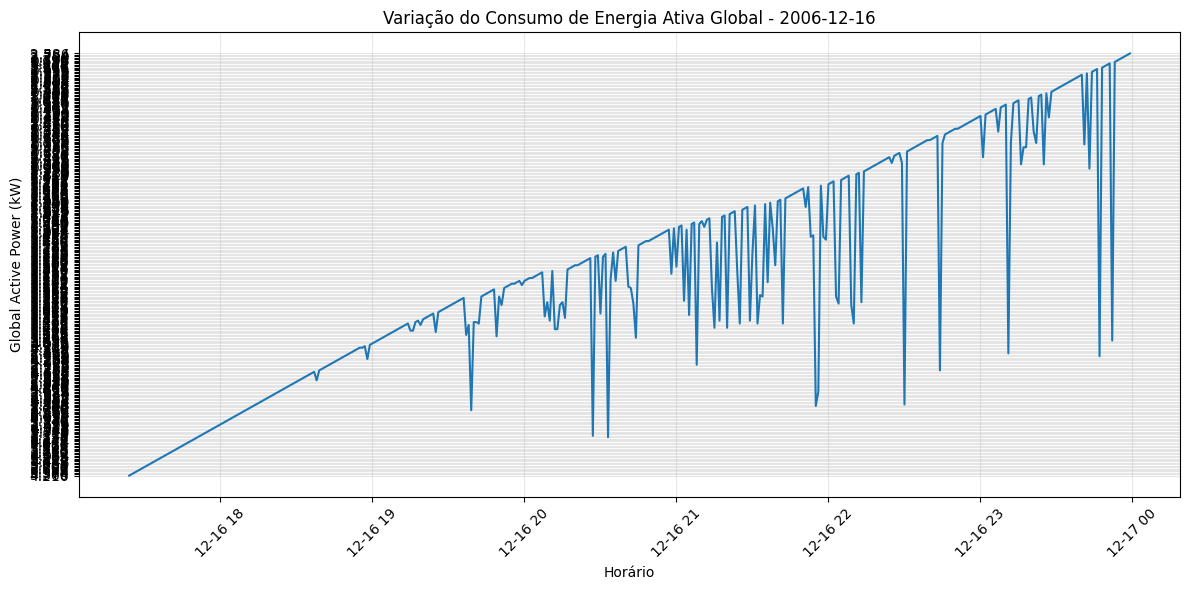

In [18]:
sample_day = df['DateTime'].dt.date.iloc[0] if len(df) > 0 else None
if sample_day:
    day_data = df[df['DateTime'].dt.date == sample_day].copy()

    plt.figure(figsize=(12, 6))
    plt.plot(day_data['DateTime'], day_data['Global_active_power'], linewidth=1.5)
    plt.title(f'Variação do Consumo de Energia Ativa Global - {sample_day}')
    plt.xlabel('Horário')
    plt.ylabel('Global Active Power (kW)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 7

Total de observações: 1000
Valores faltantes: 0
Valores válidos: 1000

ESTATÍSTICAS DA VOLTAGE:
count    1000.000000
mean      220.289981
std        14.688239
min       171.380990
25%       210.286145
50%       220.379509
75%       229.719158
max       277.790972
Name: Voltage, dtype: float64

OBSERVAÇÕES SOBRE A DISTRIBUIÇÃO:
- A tensão varia entre 171.4V e 277.8V
- Tensão média: 220.3V
- Desvio padrão: 14.7V
- Mediana: 220.4V
- A distribuição é aproximadamente simétrica
- Coeficiente de assimetria: 0.117


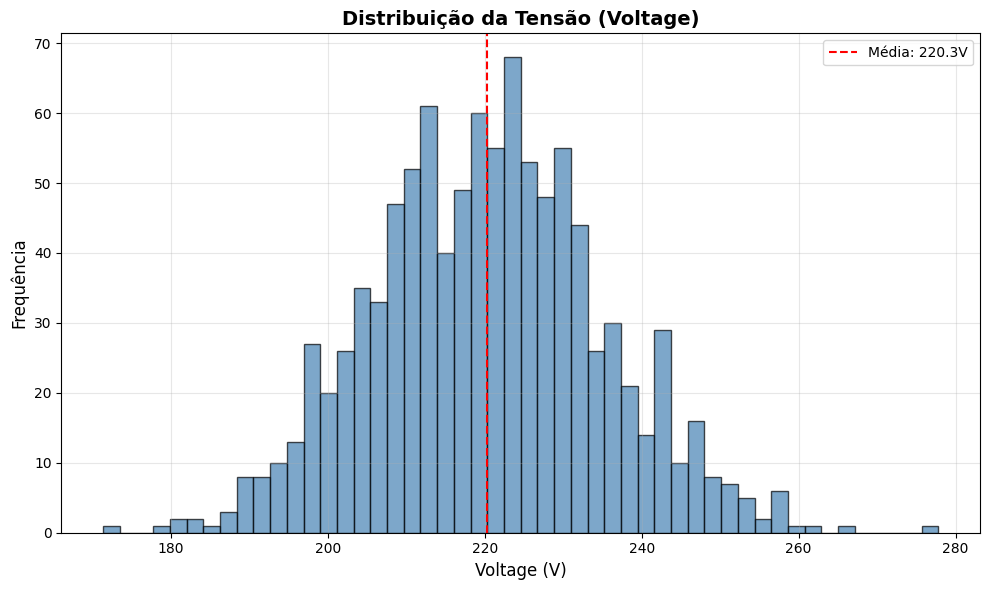

In [19]:
np.random.seed(42)
sample_data = {
    'Voltage': np.random.normal(220, 15, 1000)
}
df = pd.DataFrame(sample_data)

if 'Voltage' not in df.columns:
    print("Erro: Coluna 'Voltage' não encontrada no DataFrame")
    print(f"Colunas disponíveis: {list(df.columns)}")
else:
    missing_values = df['Voltage'].isna().sum()
    total_values = len(df['Voltage'])

    print(f"Total de observações: {total_values}")
    print(f"Valores faltantes: {missing_values}")
    print(f"Valores válidos: {total_values - missing_values}")

    if total_values - missing_values == 0:
        print("Erro: Não há dados válidos na coluna 'Voltage'")
    else:
        plt.figure(figsize=(10, 6))

        voltage_data = df['Voltage'].dropna()

        plt.hist(voltage_data, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
        plt.title('Distribuição da Tensão (Voltage)', fontsize=14, fontweight='bold')
        plt.xlabel('Voltage (V)', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.grid(True, alpha=0.3)

        mean_voltage = voltage_data.mean()
        plt.axvline(mean_voltage, color='red', linestyle='--',
                   label=f'Média: {mean_voltage:.1f}V')
        plt.legend()

        voltage_stats = voltage_data.describe()
        print("\n" + "="*50)
        print("ESTATÍSTICAS DA VOLTAGE:")
        print("="*50)
        print(voltage_stats)

        print(f"\nOBSERVAÇÕES SOBRE A DISTRIBUIÇÃO:")
        print(f"- A tensão varia entre {voltage_stats['min']:.1f}V e {voltage_stats['max']:.1f}V")
        print(f"- Tensão média: {voltage_stats['mean']:.1f}V")
        print(f"- Desvio padrão: {voltage_stats['std']:.1f}V")
        print(f"- Mediana: {voltage_stats['50%']:.1f}V")

        skewness = voltage_data.skew()
        if abs(skewness) < 0.5:
            distribution_type = "aproximadamente simétrica"
        elif skewness > 0.5:
            distribution_type = "assimétrica positiva (cauda à direita)"
        else:
            distribution_type = "assimétrica negativa (cauda à esquerda)"

        print(f"- A distribuição é {distribution_type}")
        print(f"- Coeficiente de assimetria: {skewness:.3f}")

        plt.tight_layout()
        plt.show()

def analise_detalhada_voltage(df):
    """
    Função para análise mais detalhada da distribuição de tensão
    """
    if 'Voltage' not in df.columns:
        print("Coluna 'Voltage' não encontrada!")
        return

    voltage_data = df['Voltage'].dropna()

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0,0].hist(voltage_data, bins=30, alpha=0.7, edgecolor='black')
    axes[0,0].set_title('Histograma')
    axes[0,0].set_xlabel('Voltage (V)')
    axes[0,0].set_ylabel('Frequência')
    axes[0,0].grid(True, alpha=0.3)

    axes[0,1].boxplot(voltage_data)
    axes[0,1].set_title('Box Plot')
    axes[0,1].set_ylabel('Voltage (V)')
    axes[0,1].grid(True, alpha=0.3)

    from scipy import stats
    stats.probplot(voltage_data, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (Normalidade)')
    axes[1,0].grid(True, alpha=0.3)

    axes[1,1].hist(voltage_data, bins=30, density=True, alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Densidade')
    axes[1,1].set_xlabel('Voltage (V)')
    axes[1,1].set_ylabel('Densidade')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 8

In [20]:
df = pd.read_csv("household_power_consumption.txt", sep = ";")

df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

df['Month'] = df['DateTime'].dt.month
df['MonthName'] = df['DateTime'].dt.month_name()

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

if not df_cleaned.empty:
    monthly_consumption = df_cleaned.groupby(['Month', 'MonthName'])['Global_active_power'].mean()

    print("Consumo médio por mês:")
    monthly_consumption = monthly_consumption.sort_index(level='Month')
    for (month_num, month_name), consumption in monthly_consumption.items():
        print(f"{month_name}: {consumption:.4f} kW")
else:
    print("Não há dados válidos para calcular o consumo médio mensal.")

Consumo médio por mês:
January: 1.4622 kW
February: 1.3004 kW
March: 1.2313 kW
April: 1.0471 kW
May: 1.0296 kW
June: 0.9091 kW
July: 0.7004 kW
August: 0.5728 kW
September: 0.9757 kW
October: 1.1371 kW
November: 1.2915 kW
December: 1.4897 kW


# 9

In [60]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

daily_consumption = df_cleaned.groupby(df_cleaned['DateTime'].dt.date)['Global_active_power'].sum()

day_with_max_consumption = daily_consumption.idxmax()
max_consumption_value = daily_consumption.max()

print(f"O dia com o maior consumo de energia ativa global foi: {day_with_max_consumption}")
print(f"Consumo total nesse dia: {max_consumption_value:.4f} kW")

O dia com o maior consumo de energia ativa global foi: 2006-12-23
Consumo total nesse dia: 4773.3860 kW


# 10

Consumo médio de energia ativa global:
Dias de semana: 1.0355 kW
Fins de semana: 1.2342 kW


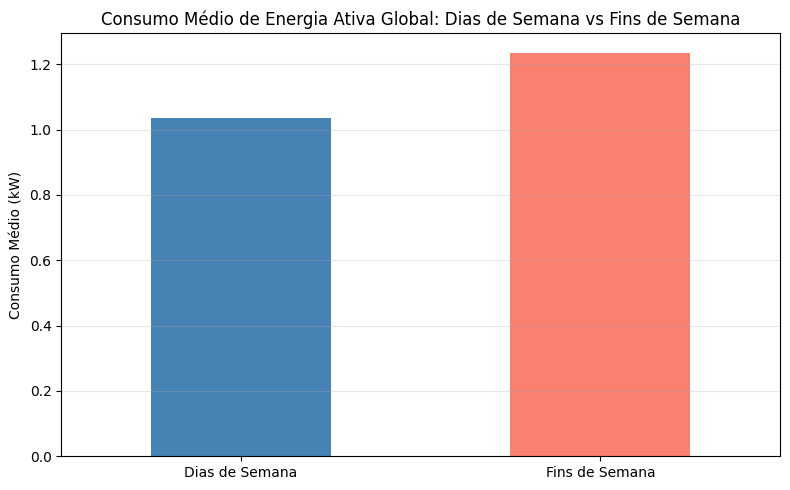

In [59]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

df_cleaned['IsWeekend'] = df_cleaned['DateTime'].dt.dayofweek >= 5  # Segunda-feira=0, Domingo=6

weekend_weekday_consumption = df_cleaned.groupby('IsWeekend')['Global_active_power'].mean()

print("Consumo médio de energia ativa global:")
print(f"Dias de semana: {weekend_weekday_consumption.loc[False]:.4f} kW")
print(f"Fins de semana: {weekend_weekday_consumption.loc[True]:.4f} kW")

plt.figure(figsize=(8, 5))
weekend_weekday_consumption.plot(kind='bar', color=['steelblue', 'salmon'])
plt.title('Consumo Médio de Energia Ativa Global: Dias de Semana vs Fins de Semana')
plt.xlabel('')
plt.ylabel('Consumo Médio (kW)')
plt.xticks([0, 1], ['Dias de Semana', 'Fins de Semana'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 11

In [23]:
correlation_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_corr = df[correlation_cols].copy()

for col in correlation_cols:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

df_corr_cleaned = df_corr.dropna()

correlation_matrix = df_corr_cleaned.corr()

print("Matriz de Correlação:")
display(correlation_matrix)

Matriz de Correlação:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


# 12

In [24]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in sub_metering_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total_Sub_metering'] = df[sub_metering_cols].sum(axis=1, skipna=True)

print("Primeiras 10 linhas com a nova coluna 'Total_Sub_metering':")
display(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head(10))

print("\nResumo estatístico da nova coluna:")
display(df['Total_Sub_metering'].describe())

Primeiras 10 linhas com a nova coluna 'Total_Sub_metering':


,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0
5,0.0,2.0,17.0,19.0
6,0.0,1.0,17.0,18.0
7,0.0,1.0,17.0,18.0
8,0.0,1.0,17.0,18.0
9,0.0,2.0,16.0,18.0



Resumo estatístico da nova coluna:


,Total_Sub_metering
count,2.075259e+06
mean,8.767741e+00
std,1.282030e+01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.800000e+01
max,1.340000e+02


# 13

In [25]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Total_Sub_metering'] = pd.to_numeric(df['Total_Sub_metering'], errors='coerce')
df_cleaned = df.dropna(subset=['Total_Sub_metering'])

if 'Month' not in df_cleaned.columns or 'MonthName' not in df_cleaned.columns:
    df_cleaned['Month'] = df_cleaned['DateTime'].dt.month
    df_cleaned['MonthName'] = df_cleaned['DateTime'].dt.month_name()

monthly_sub_metering_consumption = df_cleaned.groupby(['Month', 'MonthName'])['Total_Sub_metering'].mean()

print("Comparação das Médias Mensais (Total_Sub_metering vs Global_active_power):")
print("-" * 60)

months_exceeding = []

for (month_num, month_name), sub_metering_avg in monthly_sub_metering_consumption.items():
    global_active_avg = monthly_consumption.get((month_num, month_name), None)

    if global_active_avg is not None:
        print(f"{month_name}:")
        print(f"  Média Total_Sub_metering: {sub_metering_avg:.4f} kW")
        print(f"  Média Global_active_power: {global_active_avg:.4f} kW")
        if sub_metering_avg > global_active_avg:
            print("  => Total_Sub_metering ULTRAPASSA Global_active_power")
            months_exceeding.append(month_name)
        print("-" * 20)
    else:
        print(f"Dados de Global_active_power não disponíveis para {month_name}")
        print("-" * 20)

if months_exceeding:
    print("\nMeses onde Total_Sub_metering ultrapassou Global_active_power:")
    for month in months_exceeding:
        print(f"- {month}")
else:
    print("\nNão há meses onde Total_Sub_metering ultrapassou Global_active_power.")

Comparação das Médias Mensais (Total_Sub_metering vs Global_active_power):
------------------------------------------------------------
January:
  Média Total_Sub_metering: 10.5606 kW
  Média Global_active_power: 1.4622 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
February:
  Média Total_Sub_metering: 10.1016 kW
  Média Global_active_power: 1.3004 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
March:
  Média Total_Sub_metering: 9.7448 kW
  Média Global_active_power: 1.2313 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
April:
  Média Total_Sub_metering: 8.7346 kW
  Média Global_active_power: 1.0471 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
May:
  Média Total_Sub_metering: 9.2392 kW
  Média Global_active_power: 1.0296 kW
  => Total_Sub_metering ULTRAPASSA Global_active_power
--------------------
June:
  Média Total_Sub_metering: 8.5777 kW
  Média Global_

# 14

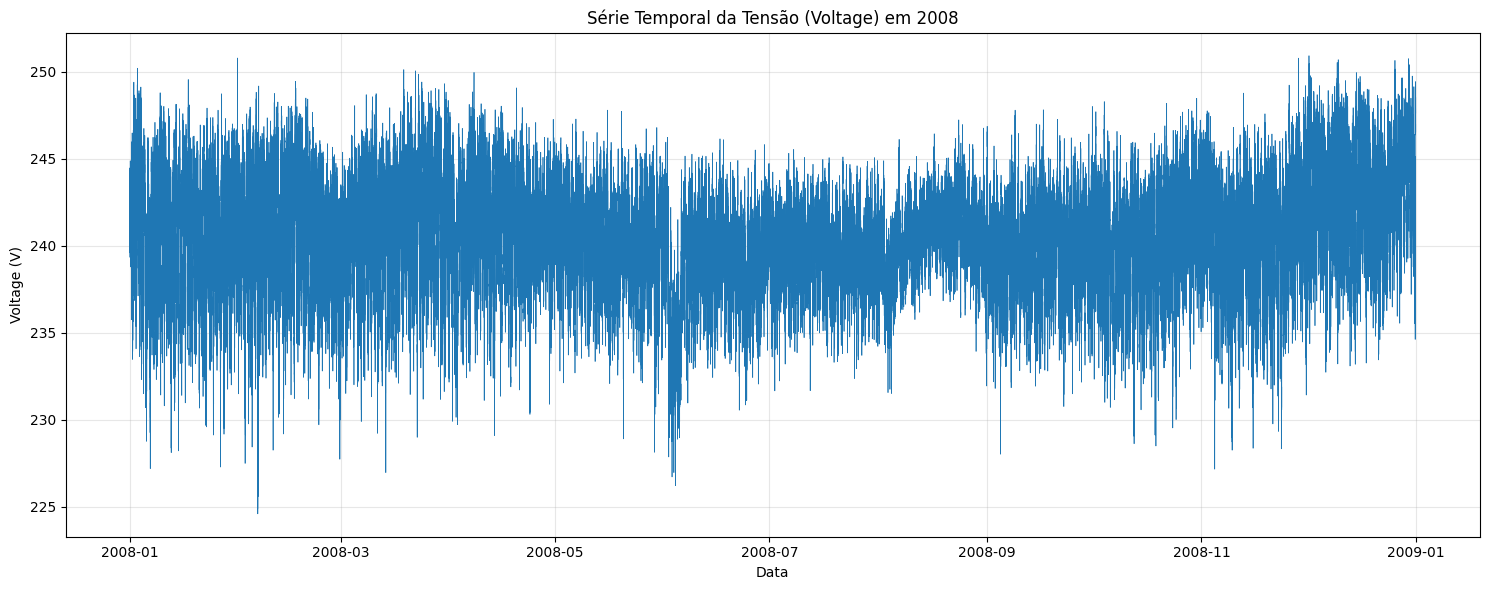

In [58]:
if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df_2008 = df[df['DateTime'].dt.year == 2008].copy()

df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')
mean_voltage_2008 = df_2008['Voltage'].mean()
df_2008['Voltage'] = df_2008['Voltage'].fillna(mean_voltage_2008)

plt.figure(figsize=(15, 6))
plt.plot(df_2008['DateTime'], df_2008['Voltage'], linewidth=0.5)
plt.title('Série Temporal da Tensão (Voltage) em 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 15

Consumo médio de energia ativa global nos meses de Verão (Jun a Ago): 0.7267 kW
Consumo médio de energia ativa global nos meses de Inverno (Dez a Fev): 1.4176 kW


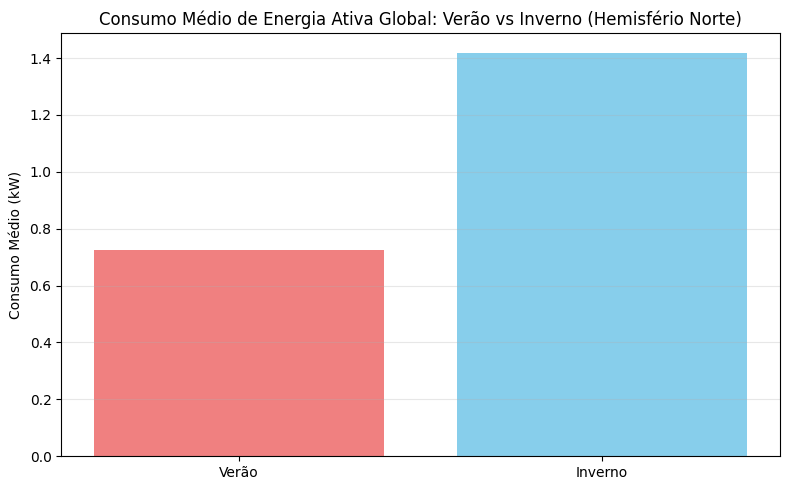

In [57]:
summer_months = [6, 7, 8]  # Junho, Julho, Agosto
winter_months = [12, 1, 2] # Dezembro, Janeiro, Fevereiro

if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned = df.dropna(subset=['Global_active_power'])

summer_consumption = df_cleaned[df_cleaned['DateTime'].dt.month.isin(summer_months)]
winter_consumption = df_cleaned[df_cleaned['DateTime'].dt.month.isin(winter_months)]

avg_summer_consumption = summer_consumption['Global_active_power'].mean()
avg_winter_consumption = winter_consumption['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global nos meses de Verão (Jun a Ago): {avg_summer_consumption:.4f} kW")
print(f"Consumo médio de energia ativa global nos meses de Inverno (Dez a Fev): {avg_winter_consumption:.4f} kW")

plt.figure(figsize=(8, 5))
labels = ['Verão', 'Inverno']
averages = [avg_summer_consumption, avg_winter_consumption]

plt.bar(labels, averages, color=['lightcoral', 'skyblue'])
plt.title('Consumo Médio de Energia Ativa Global: Verão vs Inverno (Hemisfério Norte)')
plt.ylabel('Consumo Médio (kW)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 16

Estatísticas descritivas para Global_active_power (base de dados completa):


,Global_active_power
count,2.049280e+06
mean,1.091615e+00
std,1.057294e+00
min,7.600000e-02
25%,3.080000e-01
50%,6.020000e-01
75%,1.528000e+00
max,1.112200e+01


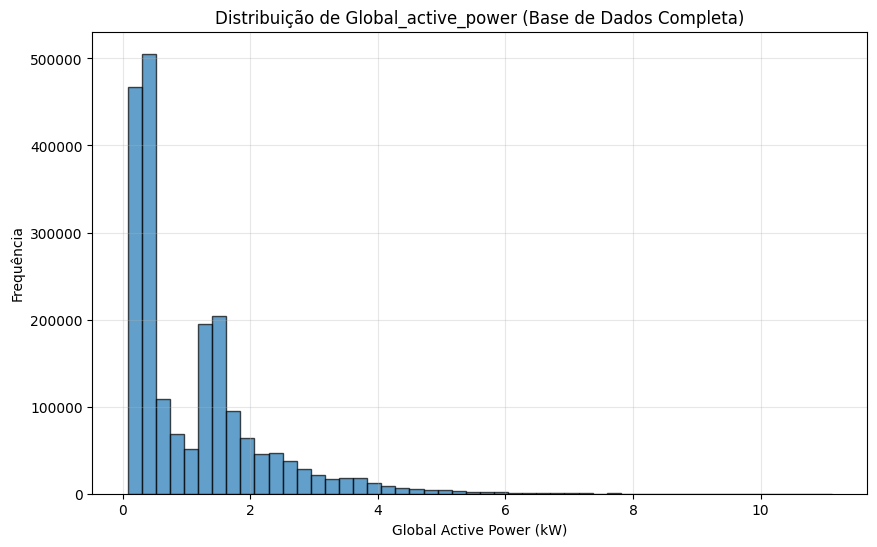


Estatísticas descritivas para Global_active_power (amostra de 1%):


,Global_active_power
count,20493.000000
mean,1.100869
std,1.059972
min,0.078000
25%,0.312000
50%,0.634000
75%,1.536000
max,8.540000


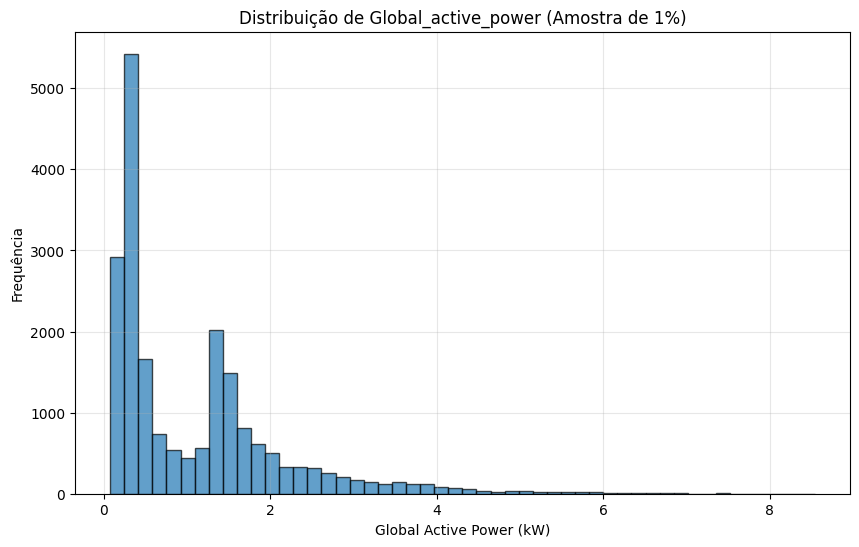

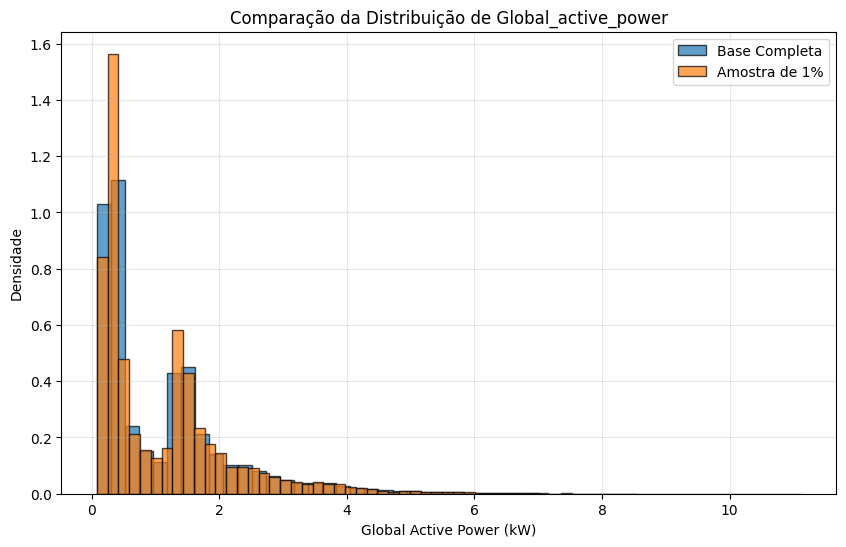

In [56]:
if not pd.api.types.is_numeric_dtype(df['Global_active_power']):
    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df_cleaned_full = df.dropna(subset=['Global_active_power']).copy()

df_sample = df_cleaned_full.sample(frac=0.01, random_state=42)

print("Estatísticas descritivas para Global_active_power (base de dados completa):")
display(df_cleaned_full['Global_active_power'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_full['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Base Completa')
plt.title('Distribuição de Global_active_power (Base de Dados Completa)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

print("\nEstatísticas descritivas para Global_active_power (amostra de 1%):")
display(df_sample['Global_active_power'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df_sample['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Amostra de 1%')
plt.title('Distribuição de Global_active_power (Amostra de 1%)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_full['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Base Completa', density=True)
plt.hist(df_sample['Global_active_power'], bins=50, alpha=0.7, edgecolor='black', label='Amostra de 1%', density=True)
plt.title('Comparação da Distribuição de Global_active_power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Com base na análise das estatísticas descritivas e dos histogramas comparativos, a distribuição da coluna Global_active_power na amostra aleatória de 1% é semelhante à distribuição da base de dados completa

# 17

In [54]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df_normalized = df.copy()

for col in numerical_cols:
    df_normalized[col] = pd.to_numeric(df_normalized[col], errors='coerce')

df_normalized_cleaned = df_normalized.dropna(subset=numerical_cols)

scaler = MinMaxScaler()

df_normalized_cleaned[numerical_cols] = scaler.fit_transform(df_normalized_cleaned[numerical_cols])

print("Primeiras 5 linhas do DataFrame com as variáveis numéricas normalizadas:")
display(df_normalized_cleaned.head())

print("\nEstatísticas descritivas das variáveis numéricas normalizadas:")
display(df_normalized_cleaned[numerical_cols].describe())

Primeiras 5 linhas do DataFrame com as variáveis numéricas normalizadas:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Month,MonthName,Total_Sub_metering
0,16/12/2006,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,2006-12-16 17:24:00,12,December,18.0
1,16/12/2006,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,2006-12-16 17:25:00,12,December,17.0
2,16/12/2006,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,2006-12-16 17:26:00,12,December,19.0
3,16/12/2006,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,2006-12-16 17:27:00,12,December,18.0
4,16/12/2006,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,2006-12-16 17:28:00,12,December,18.0



Estatísticas descritivas das variáveis numéricas normalizadas:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,9.194415e-02,8.900322e-02,5.699469e-01,9.186223e-02,1.274913e-02,1.623150e-02,2.083370e-01
std,9.571738e-02,8.109495e-02,1.046845e-01,9.220739e-02,6.992081e-02,7.277533e-02,2.721663e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100308e-02,3.453237e-02,5.101777e-01,2.489627e-02,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.761905e-02,7.194245e-02,5.754443e-01,4.979253e-02,0.000000e+00,0.000000e+00,3.225806e-02
75%,1.314503e-01,1.395683e-01,6.361874e-01,1.286307e-01,0.000000e+00,1.250000e-02,5.483871e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# 18

Primeiras 5 linhas do DataFrame com os rótulos dos clusters:


,Daily_Global_active_power,Daily_Global_active_power_Scaled,Cluster
DateTime,,,
2006-12-16,1209.176,0.253316,0
2006-12-17,3390.460,0.710284,1
2006-12-18,2203.826,0.461690,1
2006-12-19,1666.194,0.349059,2
2006-12-20,2225.748,0.466283,1



Características dos Clusters (Consumo Diário Médio):


,Cluster,Centroide_Consumo_Diario_Normalizado,Centroide_Consumo_Diario_Real (kW),Consumo_Medio_Real_no_Cluster (kW),Contagem_de_Dias
0,0,0.186004,887.869848,888.688695,449
1,1,0.516192,2463.985149,2468.755185,265
2,2,0.340187,1623.844559,1626.076255,728


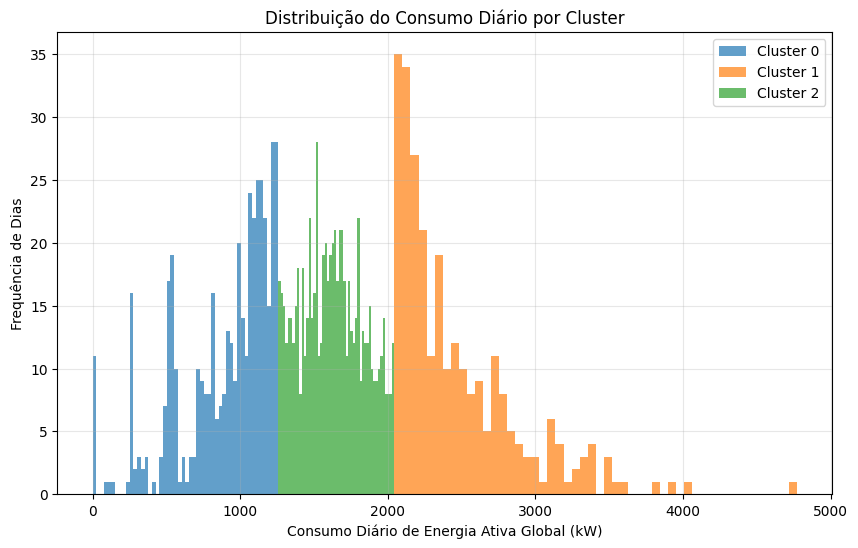


Interpretação dos Clusters:
- Cluster 0:
  Consumo Diário Médio: 888.6887 kW
  Número de Dias no Grupo: 449
  (Representa dias com BAIXO consumo de energia)
- Cluster 2:
  Consumo Diário Médio: 1626.0763 kW
  Número de Dias no Grupo: 728
  (Representa dias com MÉDIO consumo de energia)
- Cluster 1:
  Consumo Diário Médio: 2468.7552 kW
  Número de Dias no Grupo: 265
  (Representa dias com ALTO consumo de energia)


In [55]:
scaler_kmeans = MinMaxScaler()
daily_consumption_kmeans['Daily_Global_active_power_Scaled'] = scaler_kmeans.fit_transform(daily_consumption_kmeans[['Daily_Global_active_power']])

X = daily_consumption_kmeans[['Daily_Global_active_power_Scaled']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption_kmeans['Cluster'] = kmeans.fit_predict(X)

print("Primeiras 5 linhas do DataFrame com os rótulos dos clusters:")
display(daily_consumption_kmeans.head())

print("\nCaracterísticas dos Clusters (Consumo Diário Médio):")
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler_kmeans.inverse_transform(cluster_centers_scaled)

cluster_summary = pd.DataFrame({
    'Cluster': range(3),
    'Centroide_Consumo_Diario_Normalizado': cluster_centers_scaled.flatten(),
    'Centroide_Consumo_Diario_Real (kW)': cluster_centers.flatten(),
    'Consumo_Medio_Real_no_Cluster (kW)': daily_consumption_kmeans.groupby('Cluster')['Daily_Global_active_power'].mean().values
})

cluster_summary['Contagem_de_Dias'] = daily_consumption_kmeans['Cluster'].value_counts().sort_index().values

display(cluster_summary)

plt.figure(figsize=(10, 6))
for cluster in sorted(daily_consumption_kmeans['Cluster'].unique()):
    plt.hist(daily_consumption_kmeans[daily_consumption_kmeans['Cluster'] == cluster]['Daily_Global_active_power'],
             bins=50, alpha=0.7, label=f'Cluster {cluster}')

plt.title('Distribuição do Consumo Diário por Cluster')
plt.xlabel('Consumo Diário de Energia Ativa Global (kW)')
plt.ylabel('Frequência de Dias')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nInterpretação dos Clusters:")
cluster_summary_sorted = cluster_summary.sort_values(by='Consumo_Medio_Real_no_Cluster (kW)').reset_index(drop=True)

for index, row in cluster_summary_sorted.iterrows():
    print(f"- Cluster {int(row['Cluster'])}:")
    print(f"  Consumo Diário Médio: {row['Consumo_Medio_Real_no_Cluster (kW)']:.4f} kW")
    print(f"  Número de Dias no Grupo: {int(row['Contagem_de_Dias'])}")

    if index == 0:
        print("  (Representa dias com BAIXO consumo de energia)")
    elif index == 1:
         print("  (Representa dias com MÉDIO consumo de energia)")
    else:
        print("  (Representa dias com ALTO consumo de energia)")

# 19

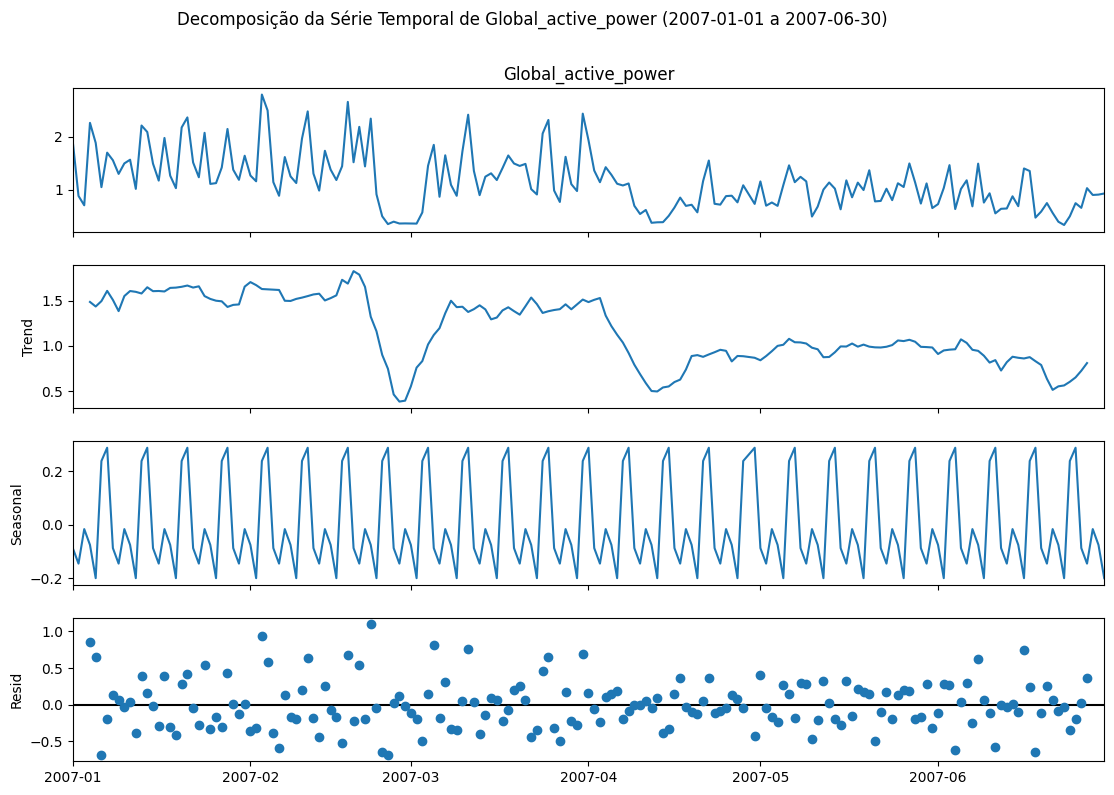

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_cleaned_ts = df.dropna(subset=['Global_active_power']).copy()
df_cleaned_ts['DateTime'] = pd.to_datetime(df_cleaned_ts['DateTime'])
df_cleaned_ts = df_cleaned_ts.set_index('DateTime')

start_date = '2007-01-01'
end_date = '2007-06-30'
df_6months = df_cleaned_ts.loc[start_date:end_date]

if df_6months.empty:
    print(f"Não há dados disponíveis entre {start_date} e {end_date} para decomposição.")
else:

    df_daily_6months = df_6months['Global_active_power'].resample('D').mean().dropna()

    if df_daily_6months.empty:
         print(f"Não há dados diários suficientes no período {start_date} a {end_date} para decomposição após reamostragem.")
    else:

        period_decomposition = 7

        if len(df_daily_6months) < 2 * period_decomposition:
             print(f"Número insuficiente de observações ({len(df_daily_6months)}) para decomposição com período de {period_decomposition}.")
             print("Considere um período menor ou um intervalo de tempo maior.")
        else:
            try:
                decomposition = seasonal_decompose(df_daily_6months, model='additive', period=period_decomposition)

                fig = decomposition.plot()
                fig.set_size_inches(12, 8)
                plt.suptitle(f'Decomposição da Série Temporal de Global_active_power ({start_date} a {end_date})', y=1.02)
                plt.show()

            except Exception as e:
                print(f"Erro ao realizar a decomposição: {e}")
                print("Verifique se o período de sazonalidade está correto e se há dados suficientes.")

# 20

Coeficiente (Inclinação): 0.2376
Intercepto: -0.0081
Erro Quadrático Médio (MSE): 0.0025
Coeficiente de Determinação (R-squared): 0.9978


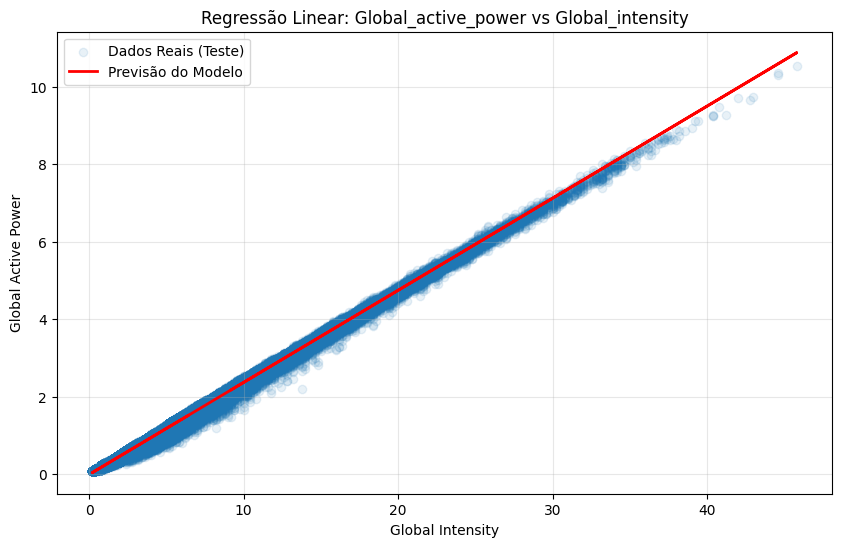

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Global_intensity']]
y = df['Global_active_power']

X['Global_intensity'] = pd.to_numeric(X['Global_intensity'], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

temp_df = pd.DataFrame({'Global_intensity': X['Global_intensity'], 'Global_active_power': y})
temp_df_cleaned = temp_df.dropna()

X_cleaned = temp_df_cleaned[['Global_intensity']]
y_cleaned = temp_df_cleaned['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente (Inclinação): {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.1, label='Dados Reais (Teste)')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsão do Modelo')
plt.title('Regressão Linear: Global_active_power vs Global_intensity')
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

O modelo de regressão linear apresentou um erro muito baixo (MSE = 0.0025) e um alto poder de explicação (R-squared = 0.9978). Isso indica que a variável Global_intensity é um preditor muito bom para Global_active_power, e o modelo linear se ajusta muito bem aos dados, resultando em previsões com pouca margem de erro